# How to use folium

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import folium

In [111]:
m = folium.Map(location=[51, 13.7])
m.save("index.html")
m

In [112]:
m = folium.Map(location=[51.04, 13.71], zoom_start = 13,  tiles="Stamen Terrain")
m

In [32]:
m = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles="Stamen Terrain")

tooltip = "Click me!"

folium.Marker(
    [45.3288, -121.6625], popup="<i>Mt. Hood Meadows</i>", tooltip=tooltip
).add_to(m)
folium.Marker(
    [45.3311, -121.7113], popup="<b>Timberline Lodge</b>", tooltip=tooltip
).add_to(m)

m

In [37]:
import json
import requests

In [38]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
antarctic_ice_edge = f"{url}/antarctic_ice_edge.json"
antarctic_ice_shelf_topo = f"{url}/antarctic_ice_shelf_topo.json"


m = folium.Map(
    location=[-59.1759, -11.6016],
    tiles="cartodbpositron",
    zoom_start=2,
)

folium.GeoJson(antarctic_ice_edge, name="geojson").add_to(m)

folium.TopoJson(
    json.loads(requests.get(antarctic_ice_shelf_topo).text),
    "objects.antarctic_ice_shelf",
    name="topojson",
).add_to(m)

folium.LayerControl().add_to(m)


m

In [39]:
import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

In [48]:
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [52]:
m = folium.Map(location=[48, -102], zoom_start=3)

bins = list(state_data["Unemployment"].quantile([0, 0.25, 0.5, 0.75, 1]))

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
    bins = bins,
    reset = True
).add_to(m)

folium.LayerControl().add_to(m)

m

# Using folium and geopandas

In [53]:
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt

In [55]:
df1 = pd.read_csv('volcano_data_2010.csv')

# Keep only relevant columns
df = df1.loc[:, ("Year", "Name", "Country", "Latitude", "Longitude", "Type")]
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       63 non-null     int64  
 1   Name       63 non-null     object 
 2   Country    63 non-null     object 
 3   Latitude   63 non-null     float64
 4   Longitude  63 non-null     float64
 5   Type       63 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.1+ KB


In [59]:
geometry = geopandas.points_from_xy(df.Longitude, df.Latitude)
geo_df = geopandas.GeoDataFrame(df[['Year','Name','Country', 'Latitude', 'Longitude', 'Type']], geometry=geometry)

geo_df.head()

,Year,Name,Country,Latitude,Longitude,Type,geometry
0,2010,Tungurahua,Ecuador,-1.467,-78.442,Stratovolcano,POINT (-78.44200 -1.46700)
1,2010,Eyjafjallajokull,Iceland,63.630,-19.620,Stratovolcano,POINT (-19.62000 63.63000)
2,2010,Pacaya,Guatemala,14.381,-90.601,Complex volcano,POINT (-90.60100 14.38100)
3,2010,Sarigan,United States,16.708,145.780,Stratovolcano,POINT (145.78000 16.70800)
4,2010,Karangetang [Api Siau],Indonesia,2.780,125.480,Stratovolcano,POINT (125.48000 2.78000)


In [70]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities =  geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
df.Type.unique()

array(['Stratovolcano', 'Complex volcano', 'Shield volcano',
       'Subglacial volcano', 'Lava dome', 'Caldera'], dtype=object)

<AxesSubplot: >

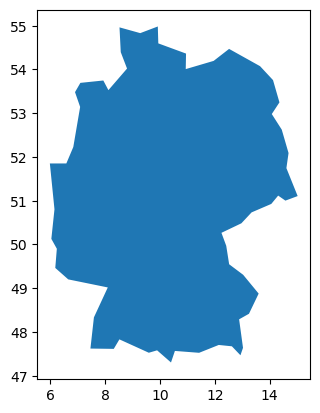

In [69]:
world.loc [world.name == 'Germany'].plot()

Text(0.5, 1.0, 'Volcanoes')

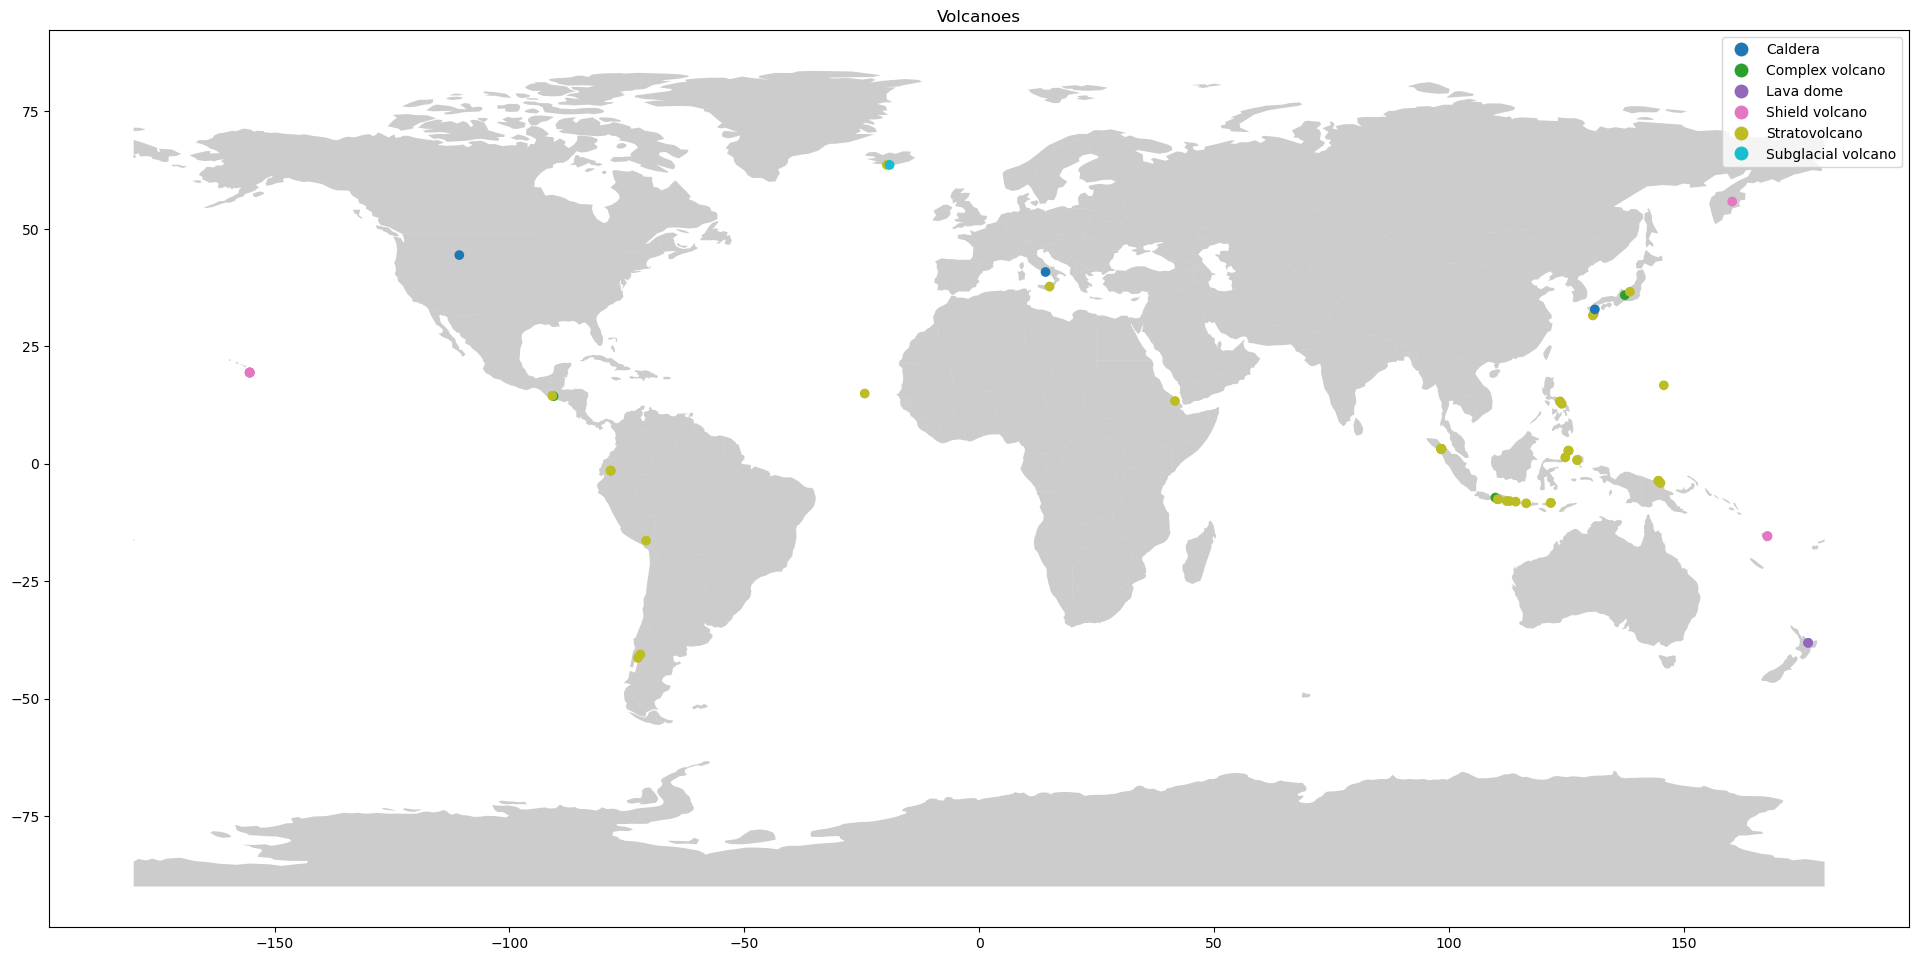

In [82]:
fig, ax = plt.subplots(figsize=(24,18))
world.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(column='Type', ax=ax, legend=True)
plt.title('Volcanoes')

In [119]:
map = folium.Map(location = (geo_df.geometry[1].x,  geo_df.geometry[1].y), tiles='OpenStreetMap' , zoom_start = 9)
map

In [117]:
my_map = folium.Map(location=[51.04, 13.71], zoom_start = 13)


tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(my_map)

my_map

In [138]:
geo_df.head()

,Year,Name,Country,Latitude,Longitude,Type,geometry
0,2010,Tungurahua,Ecuador,-1.467,-78.442,Stratovolcano,POINT (-78.44200 -1.46700)
1,2010,Eyjafjallajokull,Iceland,63.630,-19.620,Stratovolcano,POINT (-19.62000 63.63000)
2,2010,Pacaya,Guatemala,14.381,-90.601,Complex volcano,POINT (-90.60100 14.38100)
3,2010,Sarigan,United States,16.708,145.780,Stratovolcano,POINT (145.78000 16.70800)
4,2010,Karangetang [Api Siau],Indonesia,2.780,125.480,Stratovolcano,POINT (125.48000 2.78000)


In [139]:
map = folium.Map(location = [4,10], tiles = "Stamen Terrain", zoom_start = 2)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    #assign a color marker for the type of volcano, Strato being the most common
    if geo_df.Type[i] == "Stratovolcano":
        type_color = "green"
    elif geo_df.Type[i] == "Complex volcano":
        type_color = "blue"
    elif geo_df.Type[i] == "Shield volcano":
        type_color = "orange"
    elif geo_df.Type[i] == "Lava dome":
        type_color = "pink"
    else:
        type_color = "purple"


    # Place the markers with the popup labels and data
    folium.Marker(location = coordinates,
                    popup =
                    "Year: " + str(geo_df.Year[i]) + '<br>' +
                    "Name: " + str(geo_df.Name[i]) + '<br>' +
                    "Country: " + str(geo_df.Country[i]) + '<br>'
                    "Type: " + str(geo_df.Type[i]) + '<br>'
                    "Coordinates: " + str(geo_df_list[i]),
                    icon = folium.Icon(color = "%s" % type_color)).add_to(map)
    i = i + 1
map

In [151]:
my_map = folium.Map(location=[51.04, 13.71], zoom_start = 13)


tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(my_map)

folium.Marker(location = [51.04, 13.71],  icon=folium.Icon(color="blue", icon="cog", prefix = 'fa') ).add_to(my_map)
my_map

In [152]:
from folium import plugins

In [154]:
map = folium.Map(location = [15,30], tiles='Cartodb dark_matter', zoom_start = 2)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

heat_data
plugins.HeatMap(heat_data).add_to(map)

map